### Project 1: Working with (experimental) data

- Reading and exploring data with Pandas (Handle multiple Data files)
- Plotting data
- Transform tabular Data
- Statistics
- linear regression (Scipy)

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
## Import os to interact with the system: you can use function like dir(os)...


### We will now have a look at two options to read our data

1. Using Numpy loadtxt
1. Using Pandas read_csv

In [9]:
temperatures=[]
resistance_data=[]

for i, file in enumerate(os.listdir(os.getcwd())):
    if not '.txt' in file: continue
    data_file=np.loadtxt(file)
    temperature = float(file.split('temp_')[1].split('_data')[0])
    temperatures += [temperature]*data_file.shape[0]
    resistance_data += list(data_file)
    
print(temperatures, resistance_data)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0] [0.06615036286098933, 0.01785090104784562, 0.061639920018338186, 0.0735075916291141, 0.08728155769283605, 0.019281944614955804, 0.07103934778685297, 0.10112568826580494, 0.01204937360102, 0.05479927189505096, 0.04001419960173581, 0.036438279557490745, 0.0253401281630918, 0.011010586671364234, 0.04797762907714712, 0.016351360912803203, 0.04881285694368086, 0

In [10]:
df_data_experimental = pd.DataFrame()
df_data_experimental['T'] = np.array(temperatures)+273.15
df_data_experimental['R'] = resistance_data
df_data_experimental.to_excel('df_data_experimental.xlsx')

## Reading multiple files with pandas:
1. read the files with pd.read_csv
2. Use pd.concat to combine the Data in one Dataframe

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#csv

#### 1. select the files to read

In [11]:
import glob
files=glob.glob('temp_*.txt')
files

['temp_0.0_data.txt',
 'temp_10.0_data.txt',
 'temp_15.0_data.txt',
 'temp_20.0_data.txt',
 'temp_25.0_data.txt',
 'temp_30.0_data.txt',
 'temp_35.0_data.txt',
 'temp_40.0_data.txt',
 'temp_45.0_data.txt',
 'temp_5.0_data.txt',
 'temp_50.0_data.txt']

#### Now we will combine the resistance Data with concat!

In [15]:
result = pd.concat([pd.read_csv(f, names=['R']) for f in files], ignore_index=True)
result

temperatures=[]
for f in files:
    temperature = float(f.split('temp_')[1].split('_data')[0])
    temperatures += [temperature]*data_file.shape[0]
temperatures
result['T']=temperatures
del(temperature)
result

,R,T
0,0.066150,0.0
1,0.017851,0.0
2,0.061640,0.0
3,0.073508,0.0
4,0.087282,0.0
...,...,...
105,0.005815,50.0
106,0.007627,50.0
107,0.005391,50.0
108,0.005364,50.0


### Now lets explore our Data a bit!

In [16]:
result.dtypes

R    float64
T    float64
dtype: object

In [17]:
result.head(8)

,R,T
0,0.066150,0.0
1,0.017851,0.0
2,0.061640,0.0
3,0.073508,0.0
4,0.087282,0.0
5,0.019282,0.0
6,0.071039,0.0
7,0.101126,0.0


In [18]:
result.tail(3)

,R,T
107,0.005391,50.0
108,0.005364,50.0
109,0.006888,50.0


In [19]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       110 non-null    float64
 1   T       110 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [20]:
result.describe()

,R,T
count,110.000000,110.000000
mean,0.017855,25.000000
std,0.019053,15.883752
min,0.001009,0.000000
25%,0.006001,10.000000
50%,0.009246,25.000000
75%,0.020161,40.000000
max,0.101126,50.000000


### Plotting the Data

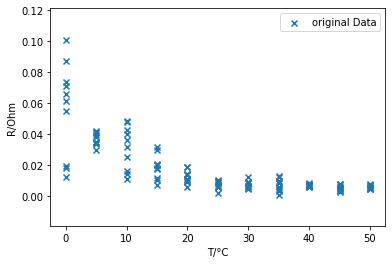

In [22]:
plt.scatter(result['T'], result['R'], marker='x', label='original Data')
plt.xlabel('T/°C')
plt.ylabel('R/Ohm')
plt.legend()
plt.show()

### Filter the Data

If you have unwanted data points you have to filter your data

In [24]:
result = result[result['R']>=0.]
result

,R,T
0,0.066150,0.0
1,0.017851,0.0
2,0.061640,0.0
3,0.073508,0.0
4,0.087282,0.0
...,...,...
105,0.005815,50.0
106,0.007627,50.0
107,0.005391,50.0
108,0.005364,50.0


### Now we are ready to do calculations with our data

1. First we need the temperature in kelvin (add +273.15)

In [25]:
result['T'] =result['T'] +273.15
result

,R,T
0,0.066150,273.15
1,0.017851,273.15
2,0.061640,273.15
3,0.073508,273.15
4,0.087282,273.15
...,...,...
105,0.005815,323.15
106,0.007627,323.15
107,0.005391,323.15
108,0.005364,323.15


### Statistics

In [29]:
df_means=result.groupby(['T'], as_index=False).mean()
df_errors=result.groupby(['T']).std()
df_means

,T,R
0,273.15,0.056473
1,278.15,0.037020
2,283.15,0.031435
3,288.15,0.018801
4,293.15,0.012647
5,298.15,0.007272
6,303.15,0.007568
7,308.15,0.007093
8,313.15,0.006972
9,318.15,0.005224


(0, 0.09)

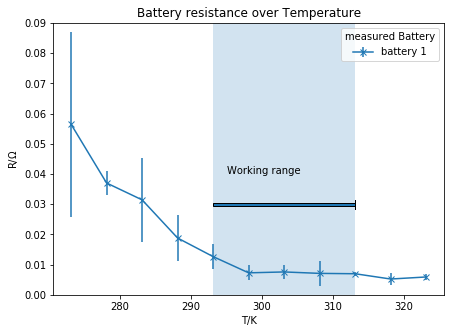

In [43]:
from matplotlib.patches import Rectangle, FancyArrow
from matplotlib.collections import PatchCollection

fig, ax =  plt.subplots(figsize=(7,5))
rect=Rectangle((293.15,0.0),20, 0.09)
arrow=FancyArrow(293.15, 0.03, 20, 0.0, width = 0.001, head_length=0)
pc= PatchCollection([rect], alpha=0.2)
ax.add_collection(pc)
ax.add_patch(arrow)

plt.errorbar(df_means['T'], df_means['R'], df_errors['R'], marker='x', label='battery 1')
plt.xlabel('T/K')
plt.ylabel('R/$\Omega$')
plt.legend(title='measured Battery')
plt.title('Battery resistance over Temperature')
plt.savefig('battery_resistance.pdf')
plt.text(295.15, 0.04, 'Working range')
plt.ylim(0,0.09)

Now it is time to prepare the data for linear regression

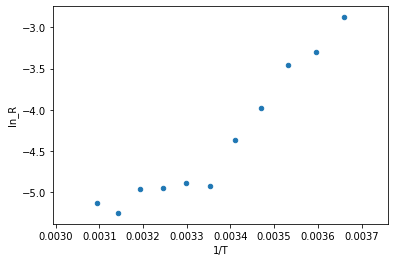

In [44]:
df_means['1/T']=1./df_means['T']
df_means['ln_R'] = np.log(df_means['R'])
df_means.plot.scatter('1/T','ln_R')
plt.xlim(df_means['1/T'].min()-0.0001, df_means['1/T'].max()+0.0001 )
plt.show()

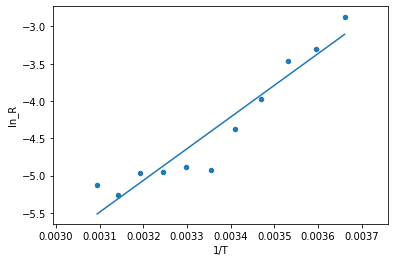

Coefficients: 
 [[4250.88956806]]
Coefficient of determination: 0.91


In [47]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
lr=linear_model.LinearRegression()

lr.fit(df_means['1/T'].values.reshape(-1,1), df_means['ln_R'].values.reshape(-1,1))
c=lr.coef_[0]
t=lr.intercept_
r2_value=lr.score(df_means['1/T'].rename_axis('1/T').values.reshape(-1,1), df_means['ln_R'].rename_axis('ln_R').values.reshape(-1,1))

df_means.plot('1/T','ln_R', kind='scatter')
plt.plot( (df_means['1/T'].min(),df_means['1/T'].max()), (df_means['1/T'].min()*c+t,df_means['1/T'].max()*c+t) )
plt.xlim(df_means['1/T'].min()-0.0001,df_means['1/T'].max()+0.0001)
plt.show()


# The coefficients
print('Coefficients: \n', lr.coef_)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_value)